# Project : FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.

### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data

In [4]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Check the shape of the dataset
df.shape

(1898, 9)

In [6]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


There are 5 numerical columns in the data and 4 object type columns.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [8]:
# Checking for missing values in the data
df.isnull().sum()

order_id 0
customer_id 0
restaurant_name 0
cuisine_type 0
cost_of_the_order 0
day_of_the_week 0
rating 0
food_preparation_time 0
delivery_time 0
dtype: int64

There are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Get the summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


The minimum is 20 minutes, average is 27.37 minutes, and maximum is 35 minutes for food to be prepared once an order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
df['rating'].value_counts() ## Complete the code

Not given 736
5 588
4 386
3 188
Name: rating, dtype: int64

There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [11]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [12]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant name

In [13]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

#### Cuisine type

In [14]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

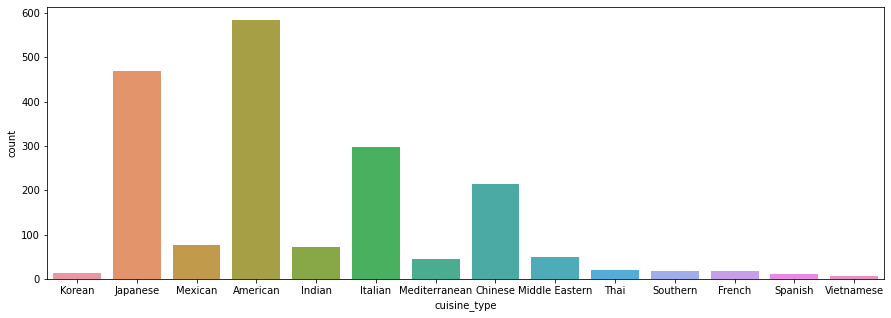

In [15]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

#### Cost of the order

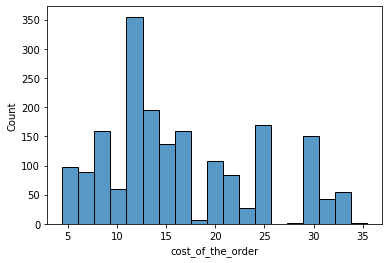

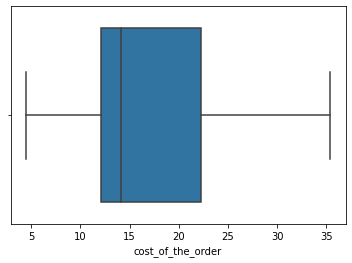

In [16]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [17]:
# # Check the unique values
df['day_of_the_week'].nunique() 

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

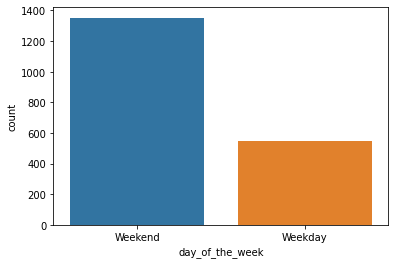

In [18]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Rating

In [19]:
# Check the unique values
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

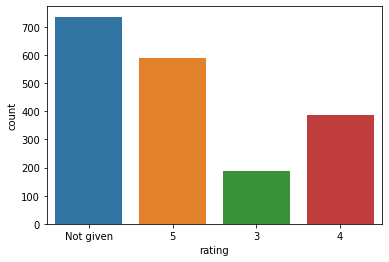

In [20]:
sns.countplot(data = df, x = 'rating')

#### Food Preparation time

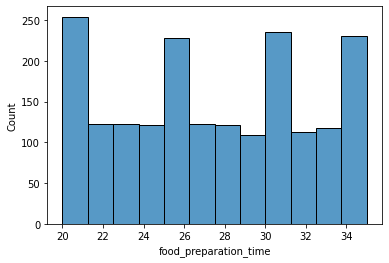

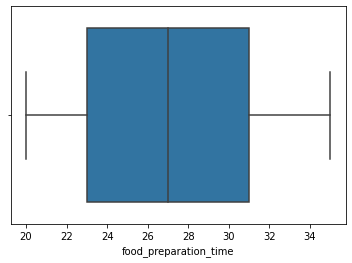

In [21]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Delivery time

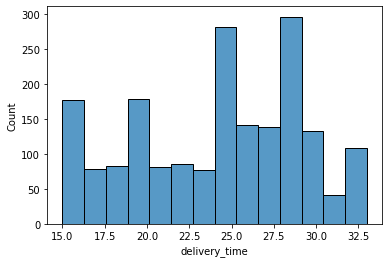

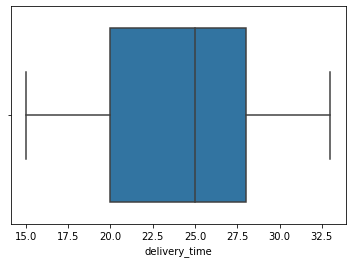

In [22]:
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack 219
The Meatball Shop 132
Blue Ribbon Sushi 119
Blue Ribbon Fried Chicken 96
Parm 68
Name: restaurant_name, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [24]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']

In [25]:
df_weekend['cuisine_type'].value_counts()

American 415
Japanese 335
Italian 207
Chinese 163
Mexican 53
Indian 49
Mediterranean 32
Middle Eastern 32
Thai 15
French 13
Korean 11
Southern 11
Spanish 11
Vietnamese 4
Name: cuisine_type, dtype: int64

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [27]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832 13
47440 10
83287 9
250494 8
259341 7
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

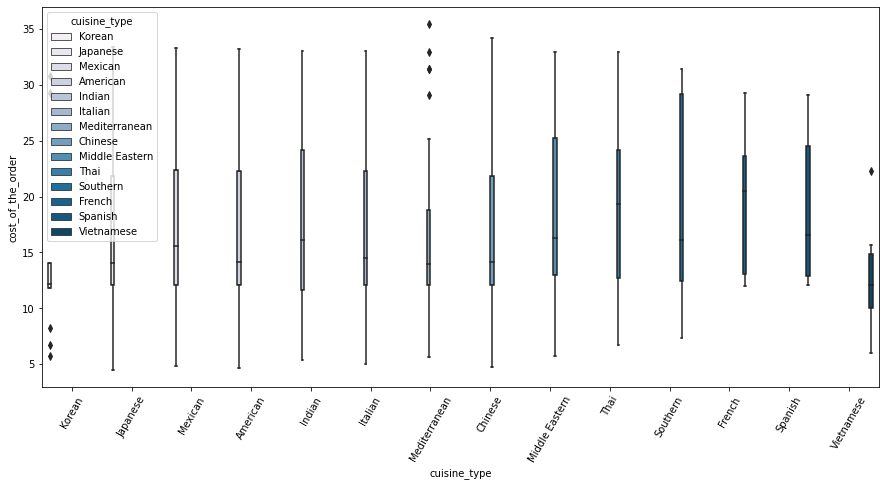

In [29]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

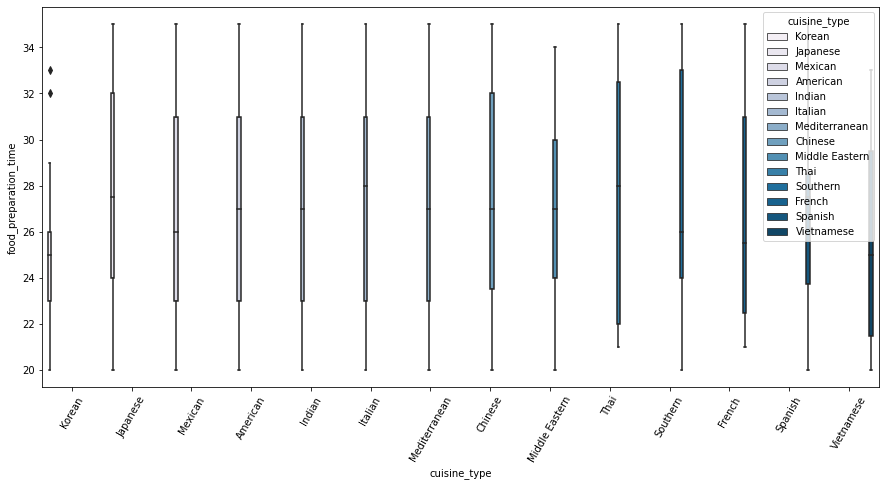

In [30]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

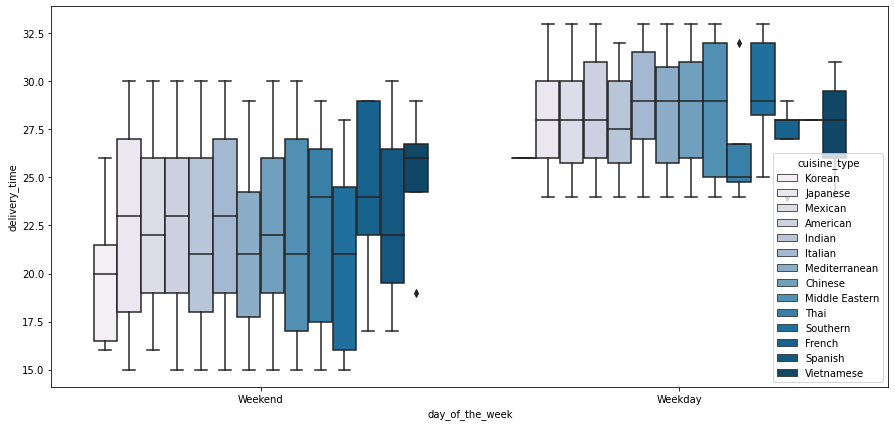

In [31]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [32]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack 3579.53
The Meatball Shop 2145.21
Blue Ribbon Sushi 1903.95
Blue Ribbon Fried Chicken 1662.29
Parm 1112.76
RedFarm Broadway 965.13
RedFarm Hudson 921.21
TAO 834.50
Han Dynasty 755.29
Blue Ribbon Sushi Bar & Grill 666.62
Rubirosa 660.45
Sushi of Gari 46 640.87
Nobu Next Door 623.67
Five Guys Burgers and Fries 506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

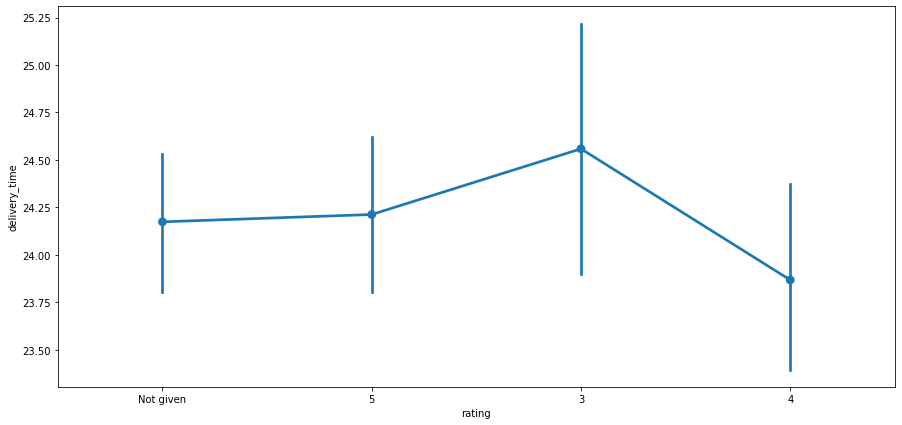

In [33]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

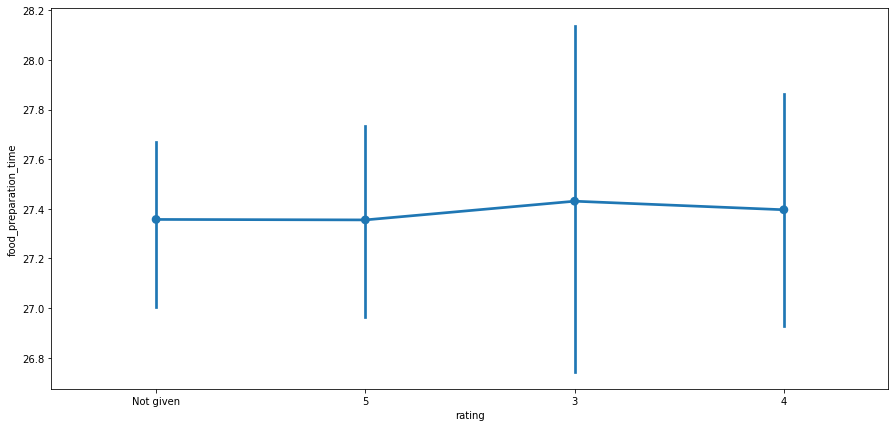

In [34]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Rating vs Cost of the order

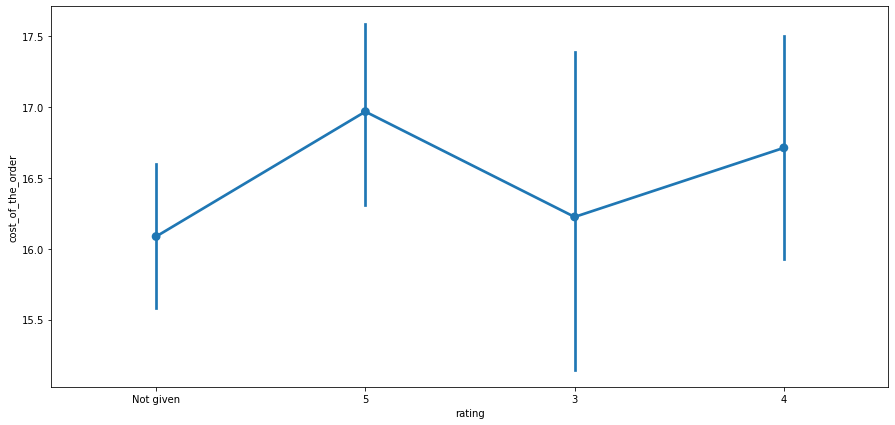

In [35]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Correlation among variables

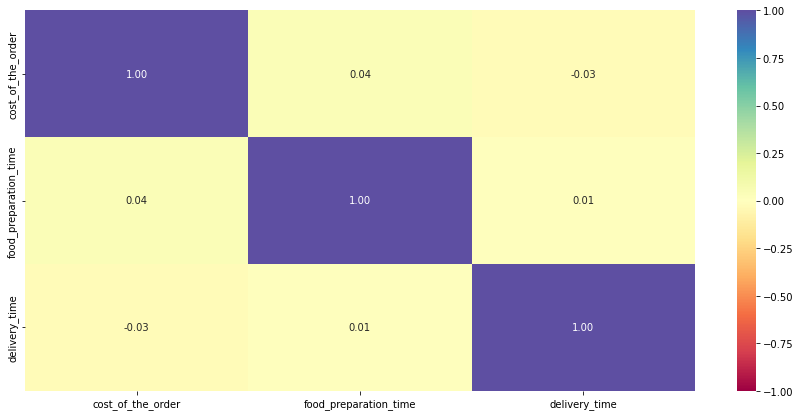

In [36]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [41]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [40]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [43]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()  # Get the total revenue by summing the Revenue column
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]

In [46]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

df_greater_than_60 = df[df['total_time']>60]

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders longer than 60 mins:", round(percentage, 2), '%')


Percentage of orders longer than 60 mins: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdays is around 22 minutes


### Conclusion and Recommendations

#### Promote American Cuisine:

Highlight Popular Choices: Since American cuisine receives the most orders, consider featuring American restaurants prominently on the app's homepage and in promotional banners.

#### Leverage Shake Shack’s Popularity:

Priority Placement: Given that Shake Shack generates the most revenue and orders, provide it with premium placement in search results and recommendations.

#### Weekend Promotions:

Targeted Marketing Campaigns: Since orders are predominantly placed on weekends, launch targeted marketing campaigns that focus on weekend promotions, such as free delivery, special weekend menus, or limited-time offers.

#### Highlight The Meatball Shop’s Quality:

Quality Assurance Marketing: Promote The Meatball Shop's high ratings as a marker of quality. Use phrases like "Top-Rated" or "Customer Favorite" in the app to attract customers who prioritize quality.